In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets.mnist import load_data

Using TensorFlow backend.


# Step 1 : Load the dataset

Use the function load_data from the mnist module

In [2]:
data = load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
np.shape(data)

(2, 2)

# The data is structured as two rows and two columns

1. The first row is the training data and the second row is the testing data
2. The first column consists of images and the second is the labels for the images

In [4]:
# Unpack the data as follows

(train_images, train_labels), (test_images, test_labels) = data

In [5]:
# Print the first image which is stored as a numpy array and print its label

train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# Print the label of first image

train_labels[0]

5

# Print all the distinct labels

Use the inbuild function set. This function takes a list or a tuple and returns a tuple with only the unique values

In [7]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
# Some information related to the data

print('Max pixel value : ',train_images[0].max())
print('Min pixel value : ',train_images[0].min())
print()
print('Shape of training data : ',train_images.shape)
print('Shape of each training exaple : ',train_images[0].shape)
print()
print('Shape of testing data : ',test_images.shape)
print('Shape of each testing example : ',test_images[0].shape)

Max pixel value :  255
Min pixel value :  0

Shape of training data :  (60000, 28, 28)
Shape of each training exaple :  (28, 28)

Shape of testing data :  (10000, 28, 28)
Shape of each testing example :  (28, 28)


# Print the pixel values directly

In [9]:
print('Label : ',train_labels[0])
print()
print(train_images[0,5:23, 5:23])
# The picture below will have a shape of 5

Label :  5

[[  0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247]
 [  0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195]
 [  0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39]
 [  0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0]
 [  0   0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0]
 [  0   0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0]
 [  0   0   0

# This representation is not very useful for a human observer
But you can roughly see the pixels values in the pattern of a digit

Thereforer, plot the data as an image

Use the imshow function. This function takes the pixels values as a matrix and print the data as an image

The colorbar displays the mapping of the pixel values and the different shades of gray 

# Step 2 : Visualize the dataset
Display few images from the training dataset with the corresponding labels

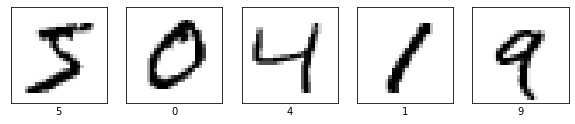

In [10]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])       # This ensures there aren't any markers along x-axis
    plt.yticks([])       # This ensures there aren't any markers along y-axis
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

#  Step 3 : Data Preprocessing

Scaling the data:
Convert all the pixel values which are in the range (0-255) to the range (0-1)

In [11]:
# Before scaling

np.unique(train_images[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

In [13]:
# After scaling

np.unique(train_images[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

# Step to build the models are :
1. Set up input layer, hidden layer and an output layer
2. Compile the model

The basic building block of a neural network (in the keras library) is the layer. Each layer consists several perception which are connected to the adjacent.

The configuration of each layer depends on the data and the problem at hand.

In [14]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation='sigmoid'),
        keras.layers.Dense(10, activation='softmax')
       ])

# Examine the structure of weights of the hidden layer

In [15]:
hidden_layer = model.layers[1]
weights = hidden_layer.get_weights()
print('Shape of weights : ',np.shape(weights[0]))
print('Shape of biases : ',np.shape(weights[1]))

Shape of weights :  (784, 128)
Shape of biases :  (128,)


# Examine the structure of weights of the output layer

In [16]:
output_layer = model.layers[2]
weights = output_layer.get_weights()
print('Shape of weights : ',np.shape(weights[0]))
print('Shape of biases : ',np.shape(weights[1]))

Shape of weights :  (128, 10)
Shape of biases :  (10,)


# Step 4 : Compile the model
1. We will use Sparse Categorical Cross Entropy as a loss function
2. We will use Stocastic Gradient Descent (SGD) optimizer
3. We will use accuracy as a matrix

In [17]:
# Learning rate is the rate at which you wants to update your 
#weights and biases
# During each update to the weights, the update includes a 
#fraction of previous weights and this fraction of previous 
# weights is called the momentum. Momentum is a technique to drive 
# sgd faster towards the optimal solution


# let us now initialized the stocastic gradient descent
# with the parameter

sgd = keras.optimizers.SGD(learning_rate=0.5, decay=1e-6, momentum=0.5)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#  Step 5 : Train the model
To start training, call the model.fit method-the model is 'fit' to the training data

In [18]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 2s 3ms/step - loss: 0.4082 - accuracy: 0.8802 - val_loss: 0.2058 - val_accuracy: 0.9422
Epoch 2/10
540/540 [==============================] - 1s 2ms/step - loss: 0.2207 - accuracy: 0.9362 - val_loss: 0.1542 - val_accuracy: 0.9595
Epoch 3/10
540/540 [==============================] - 1s 2ms/step - loss: 0.1648 - accuracy: 0.9516 - val_loss: 0.1211 - val_accuracy: 0.9672
Epoch 4/10
540/540 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9614 - val_loss: 0.1058 - val_accuracy: 0.9718
Epoch 5/10
540/540 [==============================] - 1s 2ms/step - loss: 0.1085 - accuracy: 0.9683 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 6/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9731 - val_loss: 0.0847 - val_accuracy: 0.9748
Epoch 7/10
540/540 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9772 - val_loss: 0.0806 - val_accuracy: 0.9768
Epoch 

# Step 6 : Visualize the model training

Visualize validation loss against loss over the training data set per epochs

Text(0, 0.5, 'Loss')

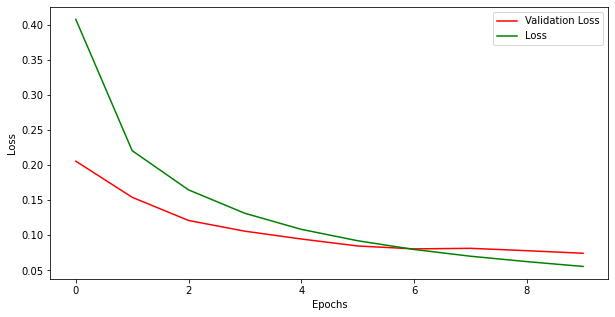

In [19]:
val_losses = history.history['val_loss']
losses = history.history['loss']
indices = range(len(losses))

plt.figure(figsize=(10,5))
plt.plot(indices, val_losses, color='r')
plt.plot(indices, losses, color='g')
plt.legend(['Validation Loss','Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

From the graph, it is very clear that after some indices the accuracy over training set is more than the accuracy over validation set, which is the condition of overfitting. The model has started to memorize the training dataset 

# Step 7 : Compute accuracy and make predictions
Evaluate the model by computing the accuracy over testing data

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ',test_acc)
print('Test loss : ',test_loss)


313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9774
Test accuracy :  0.977400004863739
Test loss :  0.07908426970243454


# Make Predictions
With the model trained, we can use it to make predictions about the images in the training data. 

In [21]:
predictions = model.predict(test_images)

# Define a function to display images along with confidence levels

In [22]:
def plot_confidence(images, labels, predictions):
  plt.figure(figsize=(15,30))
  plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.6, wspace=1.2)
  plot_index = 0
  for i in range(len(images)):
    plot_index +=1
    plt.subplot(len(images), 2, plot_index)
    plt.imshow(images[i], cmap=plt.cm.binary)     # plt.cm.binary is used to display the array as a gray scale image  
    correct_label = str(labels[i])
    predicted_label = str(np.argmax(predictions[i]))
    title = 'Corrected Label : ' + str(labels[i]) + '\n' + 'Predicted Label : ' + str(np.argmax(predictions[i]))

    if predicted_label != correct_label:
      plt.title(title, backgroundcolor = 'r', color='w')
    else:
      plt.title(title, backgroundcolor = 'g', color='w' ) 
    plt.xticks([])
    plt.yticks([])

    plot_index +=1
    plt.subplot(len(images), 2, plot_index)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.ylim(0,1)

# Plot the first 10 images and the confidence levels from the testing data set

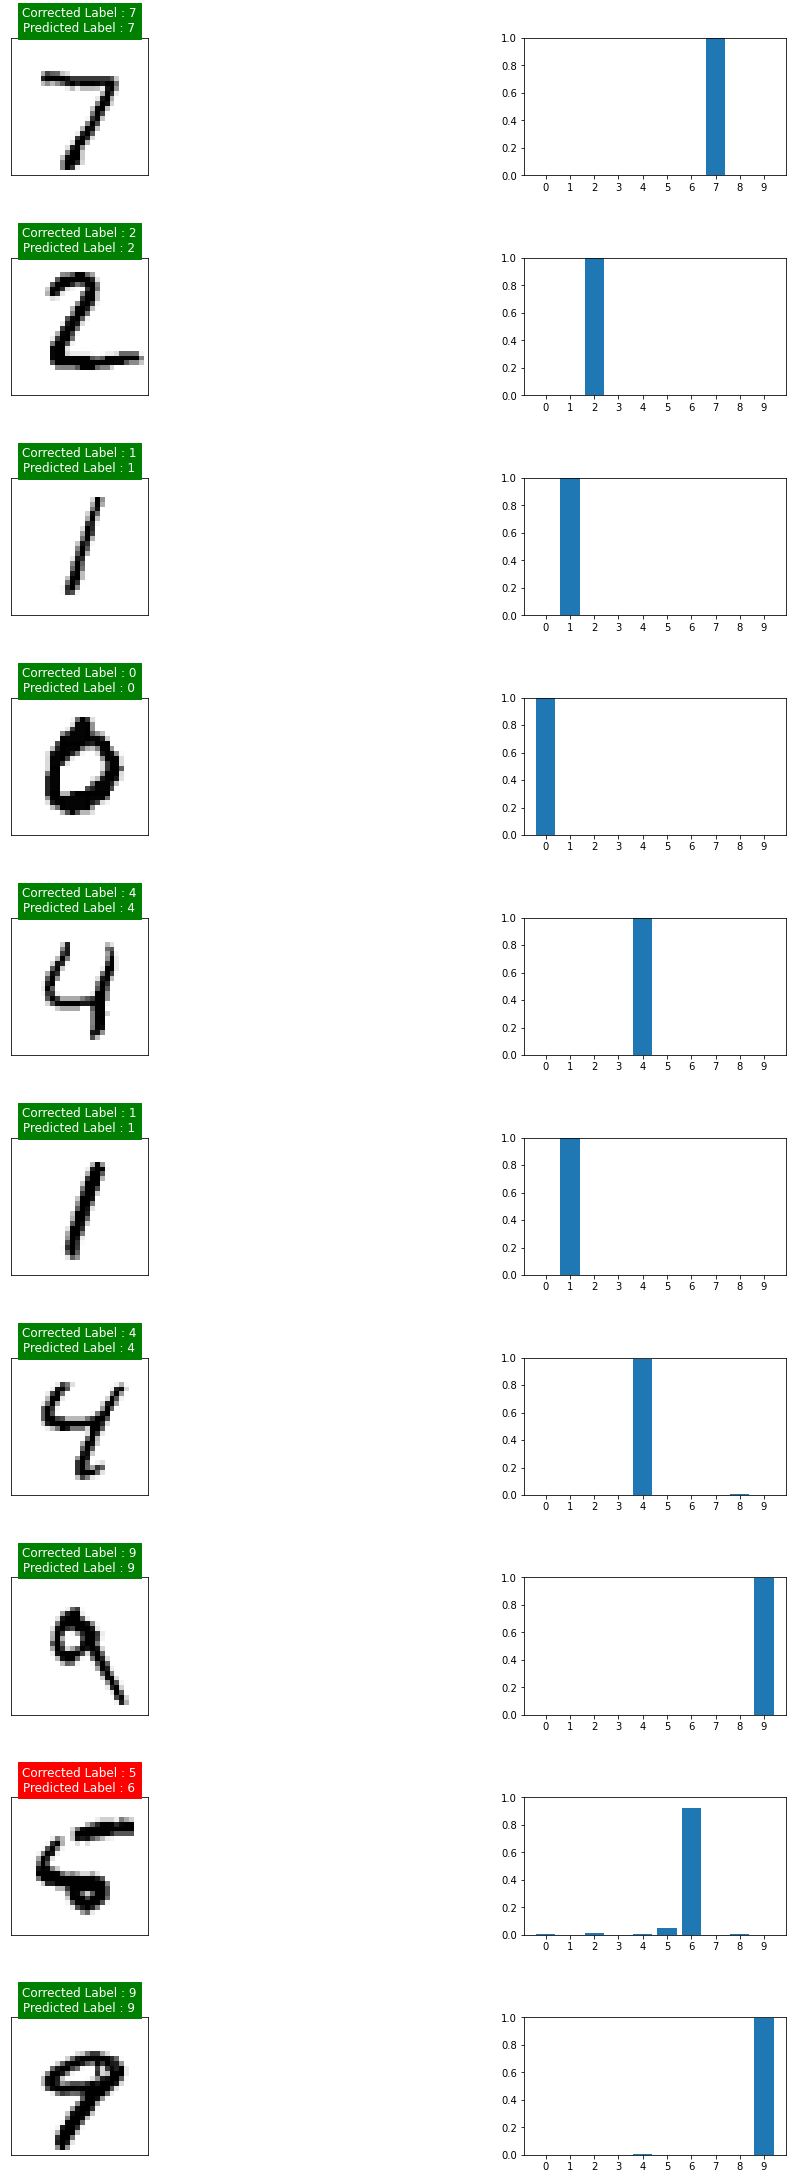

In [23]:
images = test_images[:10]
labels = test_labels[:10]
test_predictions = predictions[:10]
plot_confidence(images, labels, test_predictions)

# Display the images that could not be classified correctly by the model
We can observe here that the handwritten digits are ambiguious. If you comapare the predicted label and the true label you will see the similarities between the predicted number and the actual number  

Number of incorrectly classified images :  226


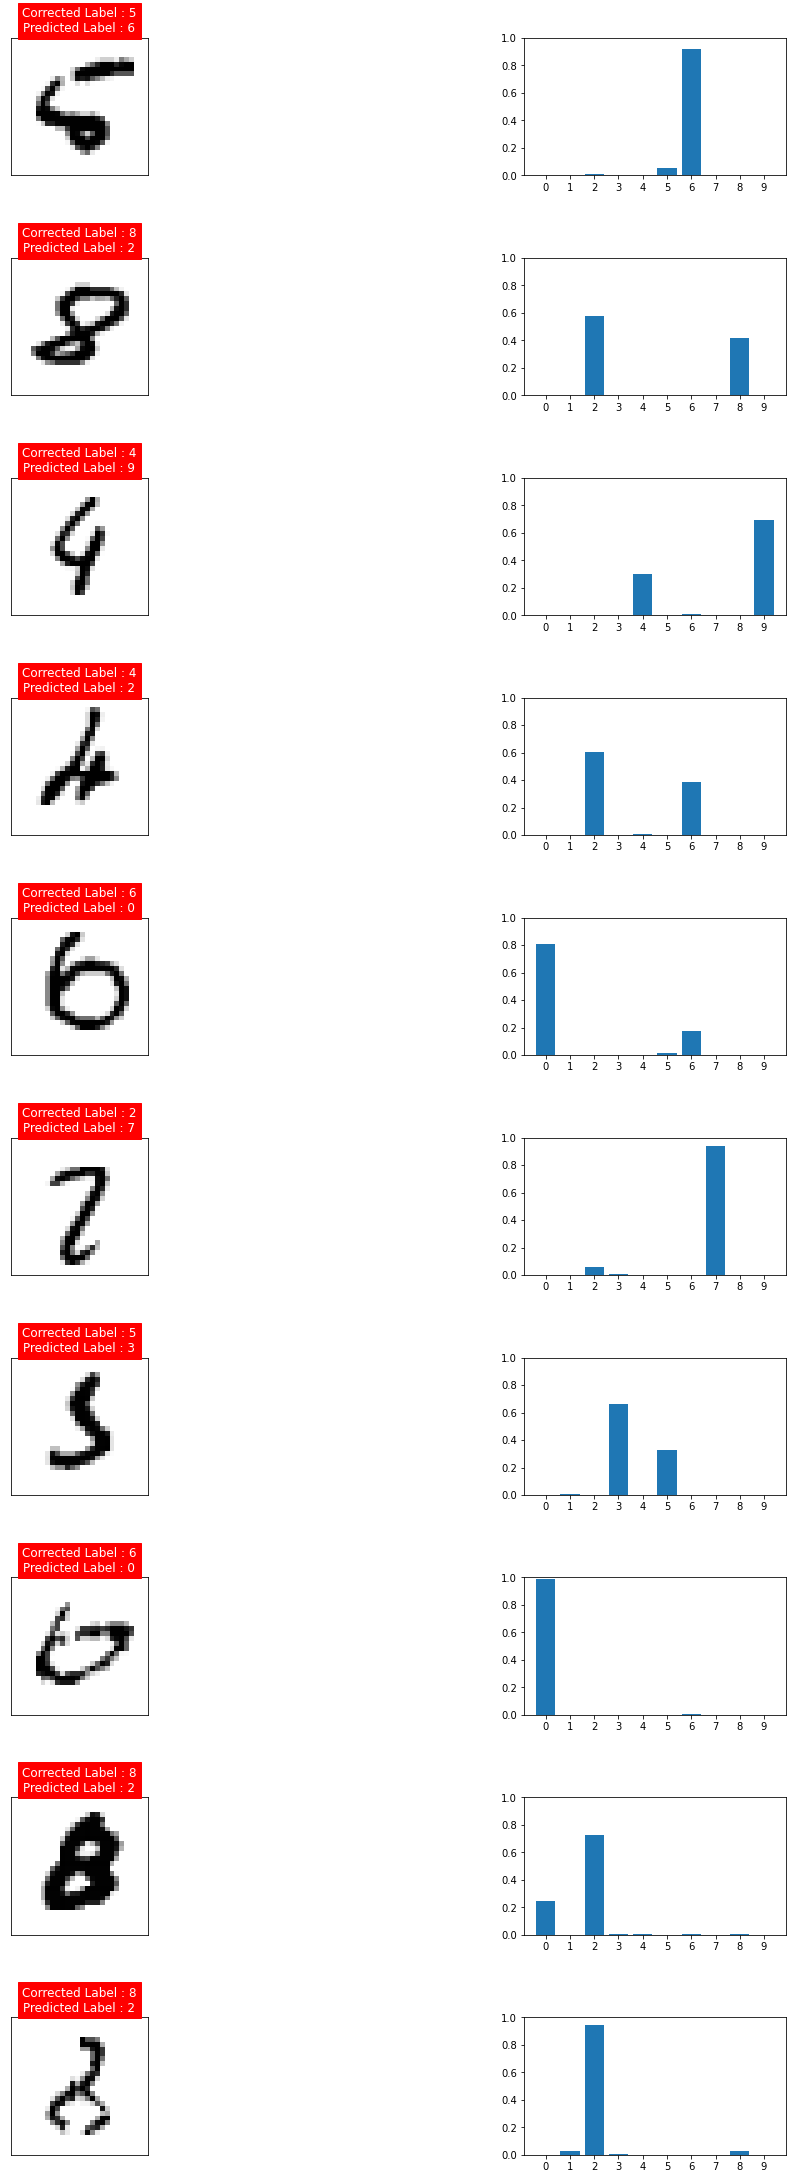

In [24]:
incorrect_indices = []

for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  if predicted_label != test_labels[i]:
    incorrect_indices.append(i)

print('Number of incorrectly classified images : ',len(incorrect_indices))

incorrect_indices = incorrect_indices[:10]

incorrected_images = [test_images[i] for i in incorrect_indices]
incorrected_labels = [test_labels[i] for i in incorrect_indices]
incorrected_predictions = [predictions[i] for i in incorrect_indices]

plot_confidence(incorrected_images, incorrected_labels, incorrected_predictions)

We can see that all of the above wrongly recognized digits are not written properly. Some part of the digits are missing, causing it to actually look like the predicted digits or some digits may be in abnormal shape etc. This is also because neuaral network is only able to predict the images correctly if the images conforms to the format of images in the dataset. If the digit is off centered, partial or of different size, the neuaral network will not be able to classify the digits correctly.   